In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from mpl_toolkits import mplot3d
import matplotlib

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [3]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

## Fit for toy data

In [4]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [5]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [22]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

[[ 0.94989148 -1.42800624]] [0.00570166]
[[ 1.14210616 -1.21548498]] [0.06394916]
[[ 1.36511844 -0.93478845]] [0.10091691]
[[ 1.55773811 -0.60499508]] [0.05129844]
[[ 1.62778321 -0.51940544]] [0.00022034]
[[ 1.64713182 -0.56881365]] [-0.04649351]
[[ 1.68183852 -0.56408007]] [-0.08812514]
[[ 1.70819843 -0.57690179]] [-0.12667064]
[[ 1.73439089 -0.58420315]] [-0.16222397]
[[ 1.75859669 -0.59205018]] [-0.19524254]
[[ 1.78141769 -0.59927486]] [-0.22600175]
[[ 1.80294755 -0.60610962]] [-0.25475649]
[[ 1.82332628 -0.61257754]] [-0.28172132]
[[ 1.84266835 -0.61871562]] [-0.30708076]
[[ 1.86107294 -0.62455505]] [-0.33099406]
[[ 1.87862621 -0.63012302]] [-0.35359938]
[[ 1.89540335 -0.63544334]] [-0.37501715]
[[ 1.91147031 -0.64053693]] [-0.39535287]
[[ 1.9268852  -0.64542228]] [-0.41469933]
[[ 1.94169945 -0.65011577]] [-0.43313853]
[[ 1.95595877 -0.65463199]] [-0.4507432]
[[ 1.96970393 -0.65898395]] [-0.46757811]
[[ 1.98297144 -0.66318334]] [-0.48370114]
[[ 1.99579412 -0.66724065]] [-0.49916419

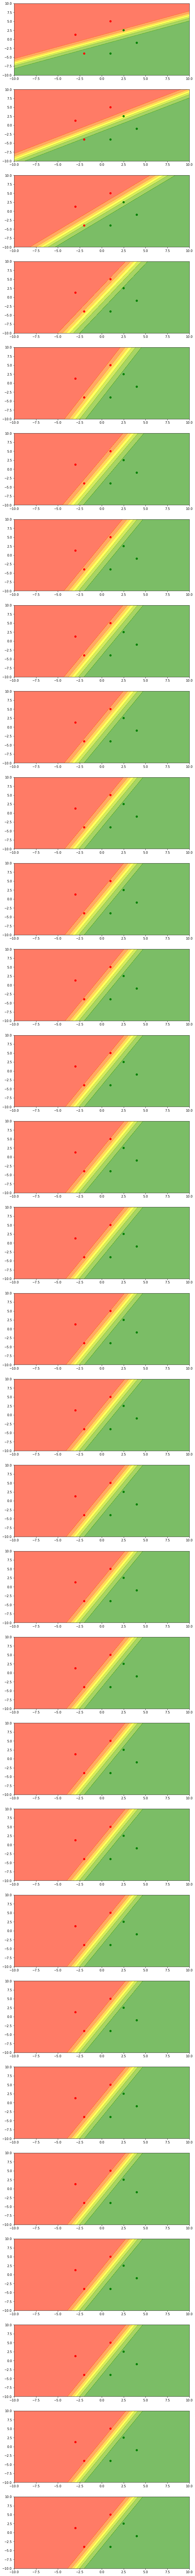

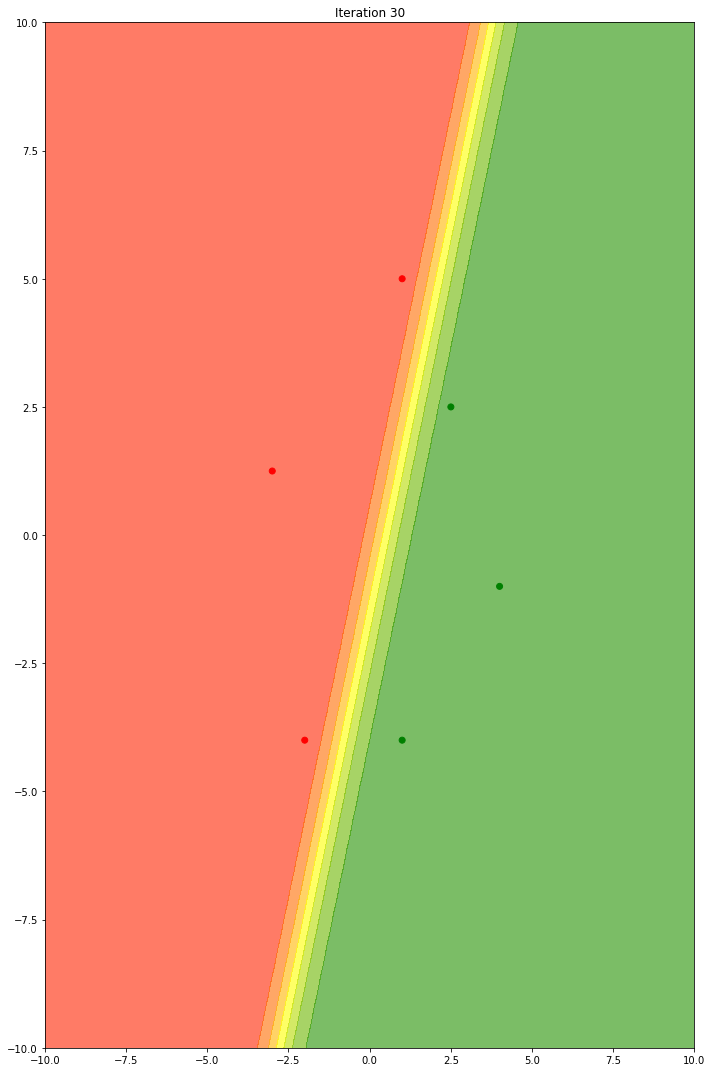

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

# Define the plot_sn function and the parameters
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=my_cmap)
    ax.plot()

# Create the figure and axis objects
N = 30
fig, ax = plt.subplots(figsize=(10, N*5))

# Initialize the animation
def animate(i):
    ax.clear()
    sn.fit(X, Y, 1, 0.5, False) # update the weights
    plot_sn(X, Y, sn, ax)
    ax.set_title(f"Iteration {i+1}") # set the title
    plt.tight_layout()
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return Image.fromarray(image)

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=N, interval=500)

# Save the animation as a gif
anim.save('Result.gif', writer='pillow')
